In [1]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from pymongo import MongoClient

In [3]:
df=pd.read_csv("India-Agriculture-Crop-Production.csv")

client=MongoClient("mongodb://localhost:27017/")
db=client['crop_production_db']
collection=db['crop_stats']

collection.insert_many(df.to_dict('records'))
print(f" Total records inserted {collection.count_documents({})}")

 Total records inserted 1381628


In [4]:
data=list(collection.find({}))
df=pd.DataFrame(data)
print(df)

                              _id                        State  \
0        6717ca3533ca1b6dda79c59b  Andaman and Nicobar Islands   
1        6717ca3533ca1b6dda79c59c  Andaman and Nicobar Islands   
2        6717ca3533ca1b6dda79c59d  Andaman and Nicobar Islands   
3        6717ca3533ca1b6dda79c59e  Andaman and Nicobar Islands   
4        6717ca3533ca1b6dda79c59f  Andaman and Nicobar Islands   
...                           ...                          ...   
1381623  6717dcd5a87eaeb6eadda9d9                      Manipur   
1381624  6717dcd5a87eaeb6eadda9da                      Manipur   
1381625  6717dcd5a87eaeb6eadda9db                      Manipur   
1381626  6717dcd5a87eaeb6eadda9dc                      Manipur   
1381627  6717dcd5a87eaeb6eadda9dd                      Manipur   

                         District      Crop     Year      Season    Area  \
0                        NICOBARS  Arecanut  2001-02      Kharif  1254.0   
1                        NICOBARS  Arecanut  2002-03  W

In [6]:
production_by_state=df.groupby('State')['Production'].sum().reset_index()
print(production_by_state)

                          State    Production
0   Andaman and Nicobar Islands  8.213419e+09
1                Andhra Pradesh  1.043049e+11
2             Arunachal Pradesh  3.808804e+07
3                         Assam  1.455086e+10
4                         Bihar  2.179814e+09
5                    Chandigarh  3.591260e+05
6                  Chhattisgarh  5.723864e+08
7        Dadra and Nagar Haveli  1.001818e+07
8                 Daman and Diu  2.370683e+05
9                         Delhi  1.066409e+07
10                          Goa  8.776014e+09
11                      Gujarat  3.230327e+09
12                      Haryana  2.358959e+09
13             Himachal Pradesh  1.291886e+08
14            Jammu and Kashmir  1.216506e+08
15                    Jharkhand  1.751753e+08
16                    Karnataka  2.550912e+11
17                       Kerala  5.188026e+11
18                      Laddakh  4.368000e+02
19               Madhya Pradesh  3.299407e+09
20                  Maharashtra  7

In [7]:
print(df.head(10))

                        _id                        State  \
0  6717ca3533ca1b6dda79c59b  Andaman and Nicobar Islands   
1  6717ca3533ca1b6dda79c59c  Andaman and Nicobar Islands   
2  6717ca3533ca1b6dda79c59d  Andaman and Nicobar Islands   
3  6717ca3533ca1b6dda79c59e  Andaman and Nicobar Islands   
4  6717ca3533ca1b6dda79c59f  Andaman and Nicobar Islands   
5  6717ca3533ca1b6dda79c5a0  Andaman and Nicobar Islands   
6  6717ca3533ca1b6dda79c5a1  Andaman and Nicobar Islands   
7  6717ca3533ca1b6dda79c5a2  Andaman and Nicobar Islands   
8  6717ca3533ca1b6dda79c5a3  Andaman and Nicobar Islands   
9  6717ca3533ca1b6dda79c5a4  Andaman and Nicobar Islands   

                   District      Crop     Year      Season    Area Area Units  \
0                  NICOBARS  Arecanut  2001-02      Kharif  1254.0    Hectare   
1                  NICOBARS  Arecanut  2002-03  Whole Year  1258.0    Hectare   
2                  NICOBARS  Arecanut  2003-04  Whole Year  1261.0    Hectare   
3  NORTH AND MI

In [8]:
print(df[['Area','Production']].describe())

               Area    Production
count  1.381496e+06  1.361656e+06
mean   1.167019e+04  9.583711e+05
std    4.583838e+04  2.152983e+07
min    4.000000e-03  0.000000e+00
25%    7.400000e+01  8.700000e+01
50%    5.320000e+02  7.170000e+02
75%    4.110000e+03  7.176000e+03
max    8.580100e+06  1.597800e+09


In [10]:
#top 5 crops with highest production
top_crops=df.groupby('Crop')['Production'].sum().reset_index().sort_values(by='Production',ascending=False).head(5)
print(top_crops)

         Crop    Production
9     Coconut  1.243219e+12
47  Sugarcane  2.895947e+10
41       Rice  8.945713e+09
54      Wheat  8.029441e+09
38     Potato  2.529263e+09


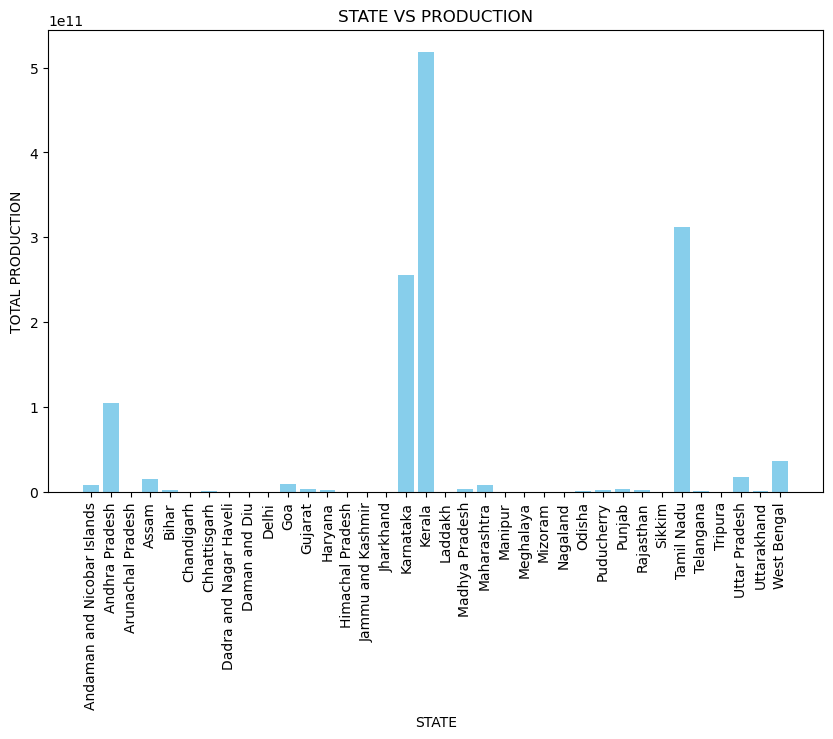

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(production_by_state['State'],production_by_state['Production'],color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('STATE')
plt.ylabel('TOTAL PRODUCTION')
plt.title('STATE VS PRODUCTION')
plt.show()

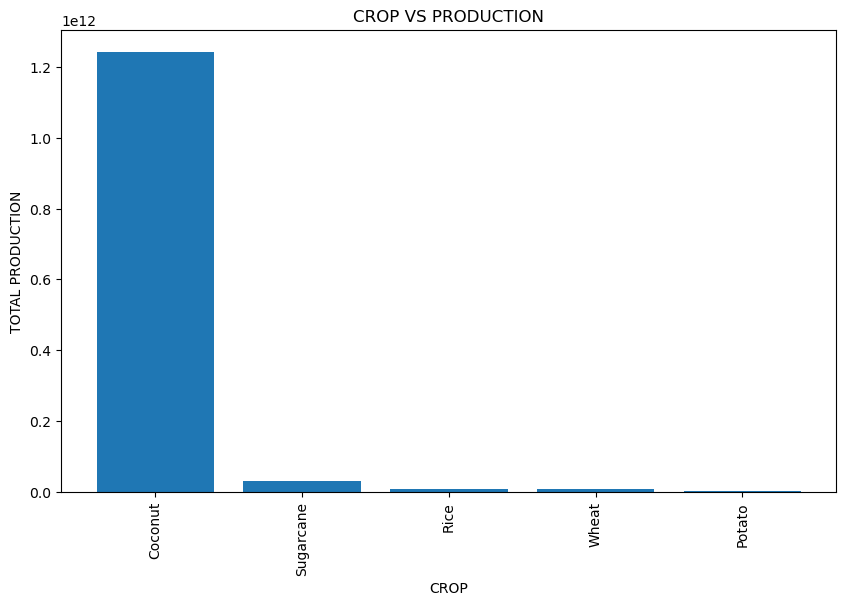

In [16]:
plt.figure(figsize=(10,6))
plt.bar(top_crops['Crop'],top_crops['Production'])
plt.xticks(rotation=90)
plt.xlabel('CROP')
plt.ylabel('TOTAL PRODUCTION')
plt.title('CROP VS PRODUCTION')
plt.show()

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('India-Agriculture-Crop-Production.csv')

# Print first few rows of the dataset to understand its structure
print(df.head())

# Preprocess the data
# Assuming 'Production' is the target variable and the rest are features
# Replace 'Production' with the actual target column in your dataset

# Handle missing values using SimpleImputer (mean strategy for numerical columns)
imputer = SimpleImputer(strategy='mean')

# Impute numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# If there are categorical columns, we convert them to numerical using LabelEncoder
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Define the features (X) and target (y)
# Replace 'Production' with your actual target column name
X = df.drop(columns='Production')
y = df['Production']

# Check for NaN values before splitting the data
print("NaN values in X:", X.isna().sum().sum())
print("NaN values in y:", y.isna().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


                         State                  District      Crop     Year  \
0  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2001-02   
1  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2002-03   
2  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2003-04   
3  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut  2001-02   
4  Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut  2002-03   

       Season    Area Area Units  Production Production Units     Yield  
0      Kharif  1254.0    Hectare      2061.0           Tonnes  1.643541  
1  Whole Year  1258.0    Hectare      2083.0           Tonnes  1.655803  
2  Whole Year  1261.0    Hectare      1525.0           Tonnes  1.209358  
3      Kharif  3100.0    Hectare      5239.0           Tonnes  1.690000  
4  Whole Year  3105.0    Hectare      5267.0           Tonnes  1.696296  
NaN values in X: 0
NaN values in y: 0
Mean Squared Error (MSE): 397576272755739.3